In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/winequalityN.csv')

print("rows, columns: ", str(df.shape))
df.head()

rows, columns:  (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Checking the missing values and filling them with means

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.fillna(df.mean())
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# One-hot encode wine type

In [6]:
type_fig = px.histogram(df,x='type')
type_fig.show()

In [7]:
df['type'] = pd.get_dummies(df['type'])
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [8]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Quantity is in range [3, 9]
Let's plot it.

In [9]:
quality_fig = px.histogram(df,x='quality')
print(df['quality'].unique())
quality_fig.show()
px.box(df, x='quality')

[6 5 7 8 4 3 9]


In [10]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Conclusion
Our data is highly imbalanced, which means we need to <br>
1. oversample <br>
2. undersample

``````


# Plot correlation matrix

<AxesSubplot:>

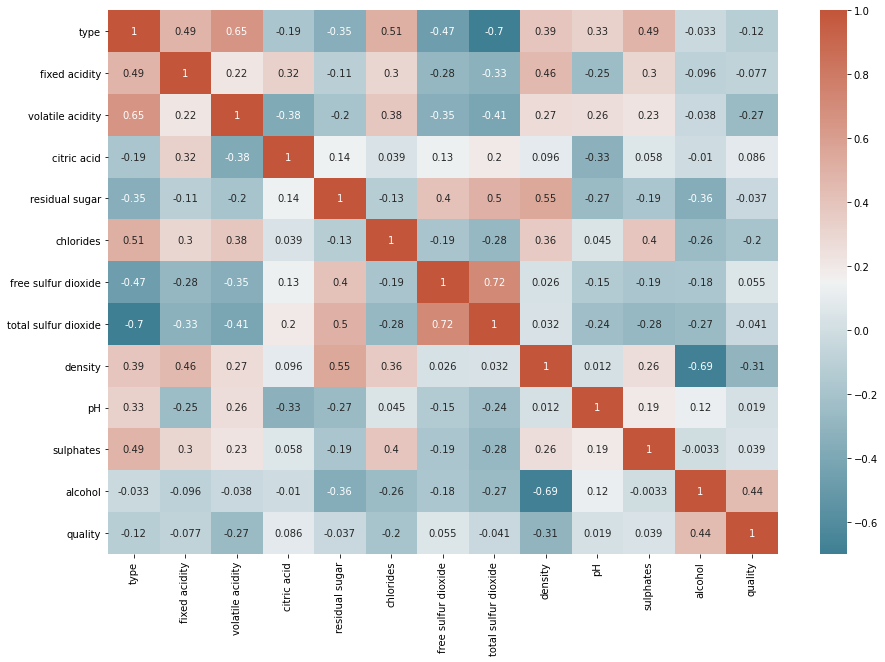

In [11]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Conclusion
***Alcohol*** compared to other features are highly correlated with wine quality *one of the most important feature*

The ***free sulfur dioxide*** and ***total sulfur dioxide*** are highly correlated, which we can also conclude from their names.

On the other hand, ***density*** and ***alcohol*** is negative correlated.

# Checking the outliers

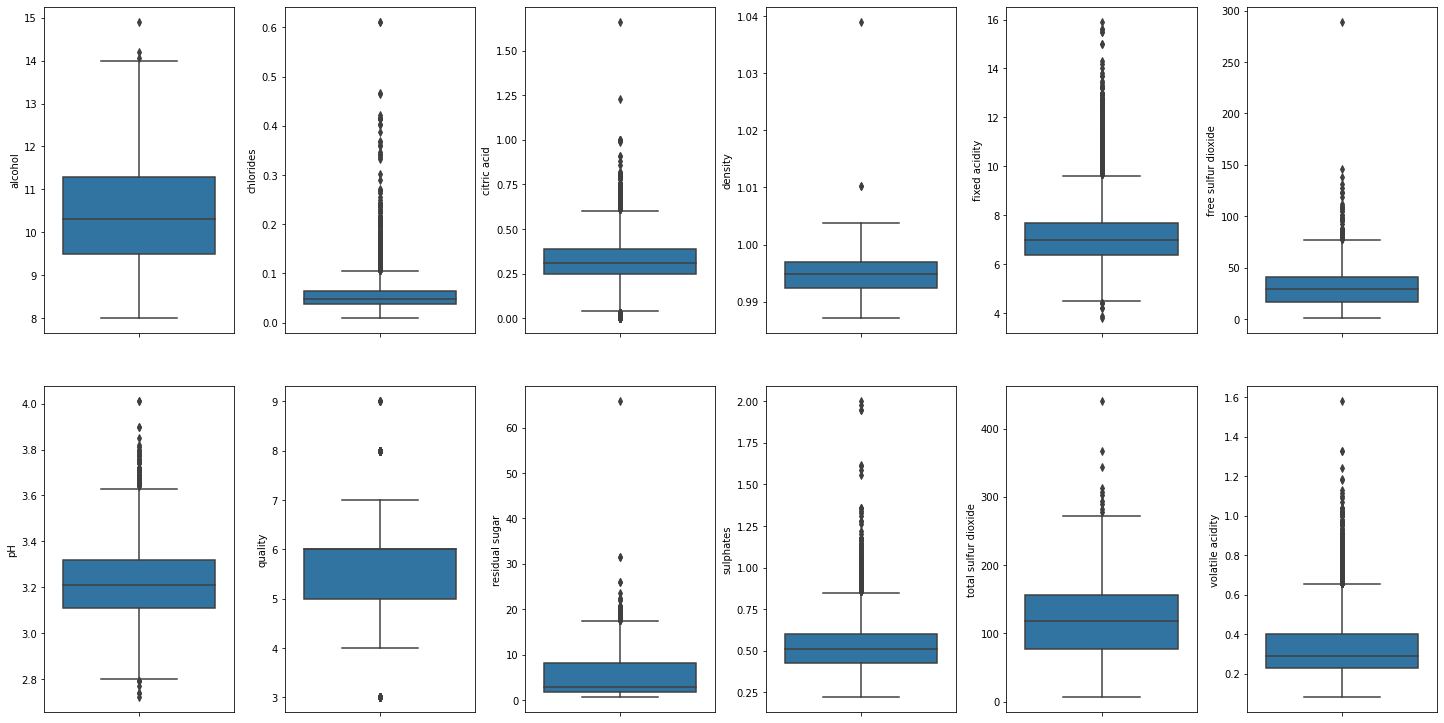

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[df.columns.difference(['type'])].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

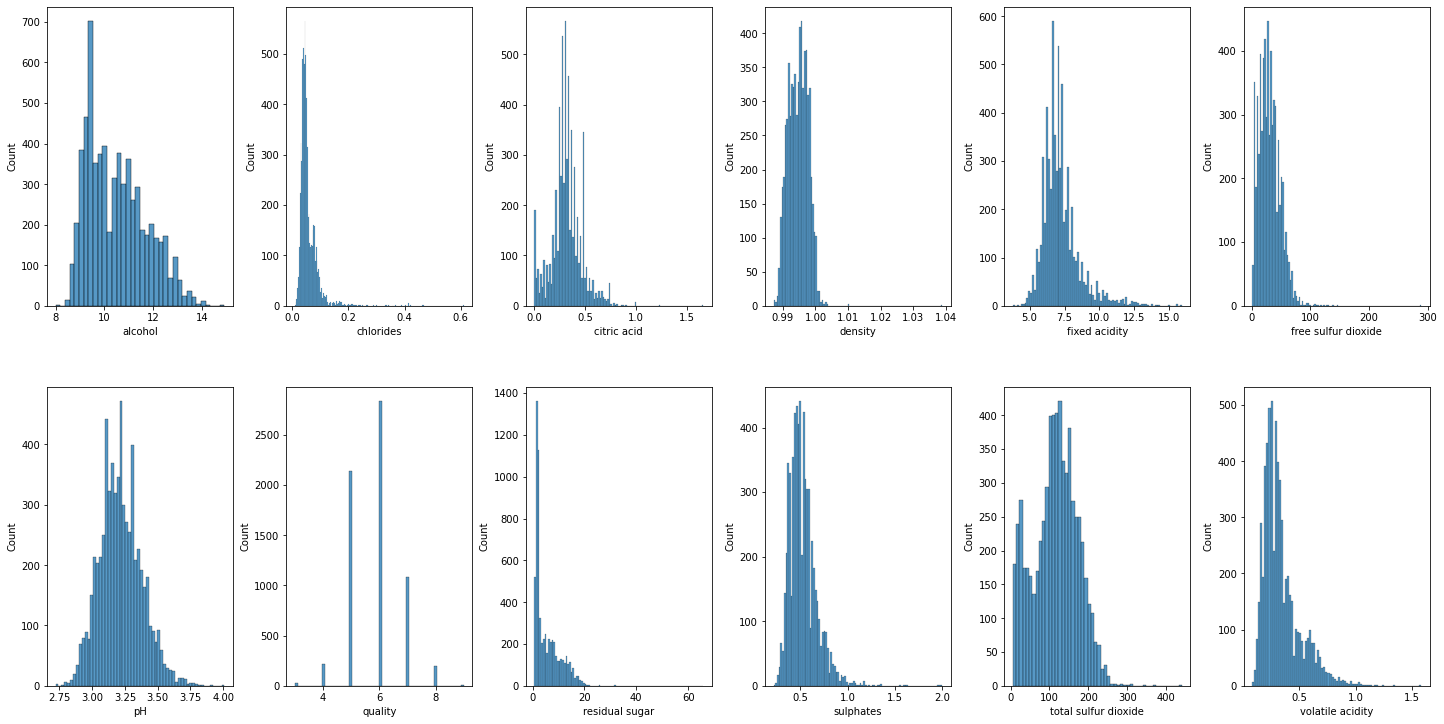

In [15]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[df.columns.difference(['type'])].items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Conclusion
The data has many outliers, which will worsen the model's accuracy.

# Removing correlated features and outliers

In [16]:
cd ..

/home/hrach2003/Projects/HTI_ML/WineQuality/WineQualityML/src


In [17]:
from utils import classify, drop_outliers

In [18]:
df.drop(['type', 'free sulfur dioxide', 'density'], axis=1, inplace=True)
for col in df.columns.difference(['quality']):
    drop_outliers(df, col)

In [19]:

X = df.drop(['quality'], axis=1)
y = df['quality']

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X, y = oversample.fit_resample(X, y)

In [21]:
cleaned_df = pd.concat([X, y], axis=1)

# Trying to simplify the data reducing the dimentions with PCA.

In [22]:
from sklearn.decomposition import PCA
import plotly.express as px

In [24]:
pca = PCA(n_components=3)
components = pca.fit_transform(cleaned_df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=y)
fig.show()
print(total_var)
print(list(zip(('x', 'y', 'z'), pca.explained_variance_ratio_)))


99.92945165378326
[('x', 0.9908107096463846), ('y', 0.0064028164177518014), ('z', 0.002080990473696257)]


## Conclusion
1. Now we can clearly see the layers of each ***quality value***.
2. High ***total_val*** says that we do not lose any information and it is a good reason for simplifying data.
3. The most important axis becomes the ***height (x)*** with over ***99%*** importancy. 
4. Our data is ready for the next step!

# Trying different models to prove the previous steps.

In [25]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=1)
classify(model1, components, y)

Accuracy: 97.48134328358209
CV Score: 95.97591552347129
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       449
           4       0.97      0.97      0.97       456
           5       0.96      0.97      0.96       466
           6       0.95      0.96      0.95       476
           7       0.97      0.96      0.96       435
           8       0.99      0.98      0.99       475
           9       1.00      1.00      1.00       459

    accuracy                           0.97      3216
   macro avg       0.97      0.97      0.97      3216
weighted avg       0.97      0.97      0.97      3216



(97.48134328358209, 95.97591552347129, array([9, 6, 5, ..., 3, 5, 5]))

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier(random_state=1)
classify(model2, components, y) 

Accuracy: 97.76119402985076
CV Score: 96.16868031537493
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       449
           4       0.98      0.99      0.98       455
           5       0.96      0.97      0.96       466
           6       0.95      0.95      0.95       479
           7       0.97      0.96      0.96       438
           8       0.99      0.99      0.99       470
           9       1.00      1.00      1.00       459

    accuracy                           0.98      3216
   macro avg       0.98      0.98      0.98      3216
weighted avg       0.98      0.98      0.98      3216



(97.76119402985076, 96.16868031537493, array([9, 6, 5, ..., 3, 5, 5]))

In [27]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=1)
classify(model3, components, y)

Accuracy: 95.9266169154229
CV Score: 94.75078534233961
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       450
           4       0.95      0.96      0.96       450
           5       0.94      0.93      0.94       473
           6       0.92      0.93      0.92       475
           7       0.94      0.93      0.94       438
           8       0.98      0.98      0.98       470
           9       1.00      1.00      1.00       460

    accuracy                           0.96      3216
   macro avg       0.96      0.96      0.96      3216
weighted avg       0.96      0.96      0.96      3216



(95.9266169154229, 94.75078534233961, array([9, 7, 5, ..., 3, 5, 5]))

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
model4 = KNeighborsClassifier(n_neighbors=int((len(y))**0.5))
classify(model4, components, y)

Accuracy: 53.917910447761194
CV Score: 54.070514457262675
              precision    recall  f1-score   support

           3       0.70      0.56      0.62       559
           4       0.62      0.49      0.55       581
           5       0.32      0.44      0.37       335
           6       0.18      0.36      0.24       245
           7       0.44      0.43      0.44       445
           8       0.63      0.58      0.61       513
           9       0.90      0.76      0.82       538

    accuracy                           0.54      3216
   macro avg       0.54      0.52      0.52      3216
weighted avg       0.59      0.54      0.56      3216



(53.917910447761194, 54.070514457262675, array([9, 7, 6, ..., 3, 4, 6]))

## Conclusion
*95-97* results are pretty good for finishing EDA

# Saving the cleaned dataframe.

In [37]:
cleaned_df.to_csv('./data/wineQuality(cleaned).csv', index=False)

In [35]:
cleaned_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
